# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

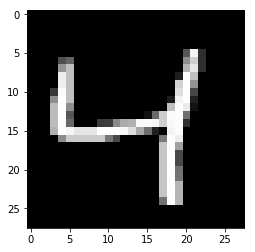

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [11]:
input_dim = mnist.train.images.shape[1]

# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, (None, input_dim), name='inputs')
targets_ = tf.placeholder(tf.float32, [None, input_dim], name='targets') # same as inputs - But why duplicate them then? Why not use directly the inputs?

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, input_dim, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=targets_)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [12]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [13]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6932
Epoch: 1/20... Training loss: 0.6905
Epoch: 1/20... Training loss: 0.6874
Epoch: 1/20... Training loss: 0.6838
Epoch: 1/20... Training loss: 0.6793
Epoch: 1/20... Training loss: 0.6731
Epoch: 1/20... Training loss: 0.6655
Epoch: 1/20... Training loss: 0.6568
Epoch: 1/20... Training loss: 0.6473
Epoch: 1/20... Training loss: 0.6357
Epoch: 1/20... Training loss: 0.6234
Epoch: 1/20... Training loss: 0.6080
Epoch: 1/20... Training loss: 0.5927
Epoch: 1/20... Training loss: 0.5768
Epoch: 1/20... Training loss: 0.5568
Epoch: 1/20... Training loss: 0.5398
Epoch: 1/20... Training loss: 0.5202
Epoch: 1/20... Training loss: 0.5050
Epoch: 1/20... Training loss: 0.4812
Epoch: 1/20... Training loss: 0.4715
Epoch: 1/20... Training loss: 0.4536
Epoch: 1/20... Training loss: 0.4335
Epoch: 1/20... Training loss: 0.4129
Epoch: 1/20... Training loss: 0.4020
Epoch: 1/20... Training loss: 0.3924
Epoch: 1/20... Training loss: 0.3771
Epoch: 1/20... Training loss: 0.3628
E

Epoch: 1/20... Training loss: 0.1936
Epoch: 1/20... Training loss: 0.1950
Epoch: 1/20... Training loss: 0.2010
Epoch: 1/20... Training loss: 0.1929
Epoch: 1/20... Training loss: 0.1965
Epoch: 1/20... Training loss: 0.1958
Epoch: 1/20... Training loss: 0.1976
Epoch: 1/20... Training loss: 0.1950
Epoch: 1/20... Training loss: 0.2013
Epoch: 1/20... Training loss: 0.1985
Epoch: 1/20... Training loss: 0.1996
Epoch: 1/20... Training loss: 0.1944
Epoch: 1/20... Training loss: 0.1876
Epoch: 1/20... Training loss: 0.1969
Epoch: 1/20... Training loss: 0.1933
Epoch: 1/20... Training loss: 0.1885
Epoch: 1/20... Training loss: 0.1999
Epoch: 1/20... Training loss: 0.1941
Epoch: 1/20... Training loss: 0.1890
Epoch: 1/20... Training loss: 0.1990
Epoch: 1/20... Training loss: 0.1919
Epoch: 1/20... Training loss: 0.1913
Epoch: 1/20... Training loss: 0.1943
Epoch: 1/20... Training loss: 0.1998
Epoch: 1/20... Training loss: 0.1871
Epoch: 1/20... Training loss: 0.1929
Epoch: 1/20... Training loss: 0.1996
E

Epoch: 2/20... Training loss: 0.1541
Epoch: 2/20... Training loss: 0.1563
Epoch: 2/20... Training loss: 0.1591
Epoch: 2/20... Training loss: 0.1570
Epoch: 2/20... Training loss: 0.1583
Epoch: 2/20... Training loss: 0.1608
Epoch: 2/20... Training loss: 0.1530
Epoch: 2/20... Training loss: 0.1544
Epoch: 2/20... Training loss: 0.1570
Epoch: 2/20... Training loss: 0.1613
Epoch: 2/20... Training loss: 0.1556
Epoch: 2/20... Training loss: 0.1563
Epoch: 2/20... Training loss: 0.1583
Epoch: 2/20... Training loss: 0.1584
Epoch: 2/20... Training loss: 0.1531
Epoch: 2/20... Training loss: 0.1585
Epoch: 2/20... Training loss: 0.1589
Epoch: 2/20... Training loss: 0.1595
Epoch: 2/20... Training loss: 0.1600
Epoch: 2/20... Training loss: 0.1524
Epoch: 2/20... Training loss: 0.1592
Epoch: 2/20... Training loss: 0.1570
Epoch: 2/20... Training loss: 0.1545
Epoch: 2/20... Training loss: 0.1581
Epoch: 2/20... Training loss: 0.1561
Epoch: 2/20... Training loss: 0.1570
Epoch: 2/20... Training loss: 0.1570
E

Epoch: 3/20... Training loss: 0.1384
Epoch: 3/20... Training loss: 0.1402
Epoch: 3/20... Training loss: 0.1405
Epoch: 3/20... Training loss: 0.1351
Epoch: 3/20... Training loss: 0.1343
Epoch: 3/20... Training loss: 0.1352
Epoch: 3/20... Training loss: 0.1407
Epoch: 3/20... Training loss: 0.1365
Epoch: 3/20... Training loss: 0.1348
Epoch: 3/20... Training loss: 0.1371
Epoch: 3/20... Training loss: 0.1425
Epoch: 3/20... Training loss: 0.1332
Epoch: 3/20... Training loss: 0.1356
Epoch: 3/20... Training loss: 0.1351
Epoch: 3/20... Training loss: 0.1387
Epoch: 3/20... Training loss: 0.1343
Epoch: 3/20... Training loss: 0.1374
Epoch: 3/20... Training loss: 0.1377
Epoch: 3/20... Training loss: 0.1361
Epoch: 3/20... Training loss: 0.1384
Epoch: 3/20... Training loss: 0.1326
Epoch: 3/20... Training loss: 0.1383
Epoch: 3/20... Training loss: 0.1385
Epoch: 3/20... Training loss: 0.1339
Epoch: 3/20... Training loss: 0.1322
Epoch: 3/20... Training loss: 0.1355
Epoch: 3/20... Training loss: 0.1327
E

Epoch: 4/20... Training loss: 0.1265
Epoch: 4/20... Training loss: 0.1233
Epoch: 4/20... Training loss: 0.1227
Epoch: 4/20... Training loss: 0.1250
Epoch: 4/20... Training loss: 0.1264
Epoch: 4/20... Training loss: 0.1267
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1224
Epoch: 4/20... Training loss: 0.1227
Epoch: 4/20... Training loss: 0.1215
Epoch: 4/20... Training loss: 0.1215
Epoch: 4/20... Training loss: 0.1290
Epoch: 4/20... Training loss: 0.1252
Epoch: 4/20... Training loss: 0.1237
Epoch: 4/20... Training loss: 0.1234
Epoch: 4/20... Training loss: 0.1239
Epoch: 4/20... Training loss: 0.1239
Epoch: 4/20... Training loss: 0.1269
Epoch: 4/20... Training loss: 0.1251
Epoch: 4/20... Training loss: 0.1261
Epoch: 4/20... Training loss: 0.1244
Epoch: 4/20... Training loss: 0.1160
Epoch: 4/20... Training loss: 0.1199
Epoch: 4/20... Training loss: 0.1222
Epoch: 4/20... Training loss: 0.1238
Epoch: 4/20... Training loss: 0.1239
Epoch: 4/20... Training loss: 0.1233
E

Epoch: 4/20... Training loss: 0.1165
Epoch: 4/20... Training loss: 0.1180
Epoch: 4/20... Training loss: 0.1189
Epoch: 4/20... Training loss: 0.1168
Epoch: 4/20... Training loss: 0.1150
Epoch: 4/20... Training loss: 0.1159
Epoch: 4/20... Training loss: 0.1178
Epoch: 4/20... Training loss: 0.1153
Epoch: 4/20... Training loss: 0.1126
Epoch: 4/20... Training loss: 0.1149
Epoch: 4/20... Training loss: 0.1156
Epoch: 4/20... Training loss: 0.1139
Epoch: 4/20... Training loss: 0.1158
Epoch: 4/20... Training loss: 0.1176
Epoch: 4/20... Training loss: 0.1090
Epoch: 4/20... Training loss: 0.1203
Epoch: 4/20... Training loss: 0.1197
Epoch: 4/20... Training loss: 0.1153
Epoch: 4/20... Training loss: 0.1176
Epoch: 4/20... Training loss: 0.1162
Epoch: 4/20... Training loss: 0.1157
Epoch: 4/20... Training loss: 0.1138
Epoch: 4/20... Training loss: 0.1154
Epoch: 4/20... Training loss: 0.1139
Epoch: 4/20... Training loss: 0.1170
Epoch: 4/20... Training loss: 0.1181
Epoch: 4/20... Training loss: 0.1179
E

Epoch: 5/20... Training loss: 0.1118
Epoch: 5/20... Training loss: 0.1088
Epoch: 5/20... Training loss: 0.1092
Epoch: 5/20... Training loss: 0.1070
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1117
Epoch: 5/20... Training loss: 0.1135
Epoch: 5/20... Training loss: 0.1072
Epoch: 5/20... Training loss: 0.1119
Epoch: 5/20... Training loss: 0.1074
Epoch: 5/20... Training loss: 0.1115
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1071
Epoch: 5/20... Training loss: 0.1139
Epoch: 5/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1094
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1085
Epoch: 5/20... Training loss: 0.1134
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1112
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1100
Epoch: 5/20... Training loss: 0.1094
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1094
Epoch: 5/20... Training loss: 0.1096
E

Epoch: 6/20... Training loss: 0.1069
Epoch: 6/20... Training loss: 0.1076
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1089
Epoch: 6/20... Training loss: 0.1084
Epoch: 6/20... Training loss: 0.1083
Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... Training loss: 0.1059
Epoch: 6/20... Training loss: 0.1022
Epoch: 6/20... Training loss: 0.1073
Epoch: 6/20... Training loss: 0.1055
Epoch: 6/20... Training loss: 0.1024
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1063
Epoch: 6/20... Training loss: 0.1104
Epoch: 6/20... Training loss: 0.1071
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1070
Epoch: 6/20... Training loss: 0.1063
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1096
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1055
Epoch: 6/20... Training loss: 0.1017
E

Epoch: 7/20... Training loss: 0.1056
Epoch: 7/20... Training loss: 0.1036
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.1038
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1048
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.1044
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.0973
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1046
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1048
Epoch: 7/20... Training loss: 0.0997
E

Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.0981
Epoch: 7/20... Training loss: 0.1037
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.0969
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.0977
Epoch: 7/20... Training loss: 0.0939
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.0984
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.0978
Epoch: 7/20... Training loss: 0.0963
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.0989
E

Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0940
Epoch: 8/20... Training loss: 0.1018
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0957
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.0937
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.0946
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.1038
Epoch: 8/20... Training loss: 0.1002
E

Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0937
Epoch: 9/20... Training loss: 0.0947
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0924
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0928
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0944
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.1004
Epoch: 9/20... Training loss: 0.0960
E

Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0913
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0985
Epoch: 10/20... Training loss: 0.0930
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0984
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0927
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0913
Epoch: 10/20... Training loss: 0.0920
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20

Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0989
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0927
Epoch: 10/20... Training loss: 0.0924
Epoch: 10/20... Training loss: 0.0933
Epoch: 10/20... Training loss: 0.0905
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.1000
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0912
Epoch: 11/20... Training loss: 0.0978
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0974
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0976
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0917
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0922
Epoch: 11/20... Training loss: 0.0977
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0913
Epoch: 11/20... Training loss: 0.0925
Epoch: 11/20... Training loss: 0.0973
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0976
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0913
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0984
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0976
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0912
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0916
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0985
Epoch: 12/20... Training loss: 0.0919
Epoch: 12/20... Training loss: 0.0912
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0965
Epoch: 12/20... Training loss: 0.0974
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0976
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0970
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0982
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0914
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0968
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0912
Epoch: 13/20... Training loss: 0.0899
Epoch: 13/20... Training loss: 0.0973
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0969
Epoch: 13/20... Training loss: 0.0984
Epoch: 13/20... Training loss: 0.0962
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0878
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0969
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0906
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0915
Epoch: 14/20... Training loss: 0.0968
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0960
Epoch: 14/20... Training loss: 0.0962
Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0884
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0897
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0903
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0915
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0973
Epoch: 15/20... Training loss: 0.0962
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0974
Epoch: 15/20... Training loss: 0.0884
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0908
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0903
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0966
Epoch: 16/20... Training loss: 0.0973
Epoch: 16/20... Training loss: 0.0963
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0967
Epoch: 16/20... Training loss: 0.0910
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0891
Epoch: 16/20... Training loss: 0.0969
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20

Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0901
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0904
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0887
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0973
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0963
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0958
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0884
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0972
Epoch: 17/20... Training loss: 0.0960
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0977
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0955
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0969
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0902
Epoch: 18/20... Training loss: 0.0908
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0960
Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0906
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0970
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0907
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0960
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0958
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0904
Epoch: 19/20... Training loss: 0.0895
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0909
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0980
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0906
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0962
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0898
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0903
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0894
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0964
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0967
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0875
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

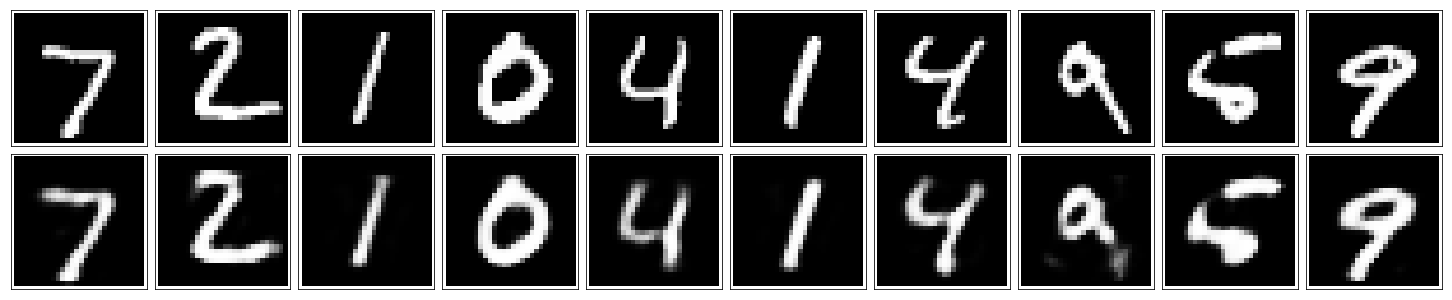

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [17]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.